<a href="https://colab.research.google.com/github/diya1094/Celebal-Technologies/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path ="/content/drive/MyDrive/Celebal/WA_Fn-UseC_-Telco-Customer-Churn.csv.xlsx"
df = pd.read_excel(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Basic Info About Dataset**
- The dataset consists of 21 columns and 7043 entries.
- It depicts the customer churn in a telecommunication company.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_cleaned = df.dropna(subset=['TotalCharges'])
print(df_cleaned.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- There are no missing values left in the dataset.

In [7]:
print(df_cleaned.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


Gives basic description of numeric columns in the dataset.

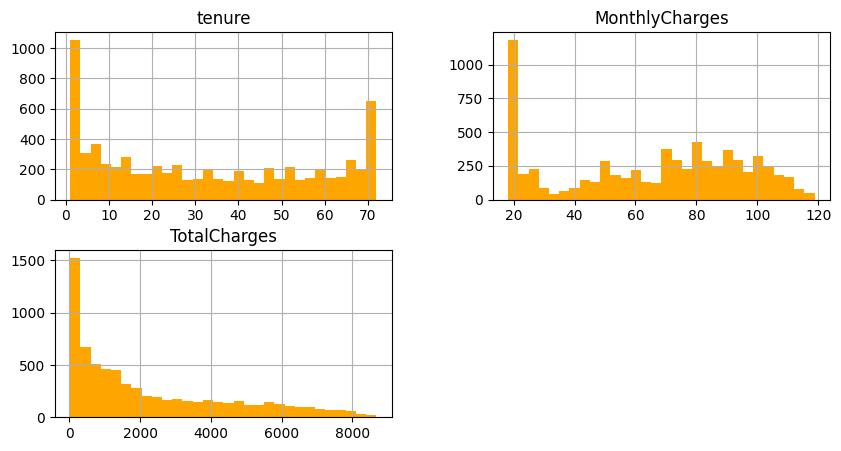

In [36]:
import matplotlib.pyplot as plt
df_cleaned[['tenure','MonthlyCharges','TotalCharges']].hist(bins=30, figsize=(10,5), color="orange")
plt.show()

# **Analysis Based on Histogram**

Tenure Histogram:
- There are large number of customer in either new(low tenure) or are with the company since a long time(high tenure).
- There are very less customer in middle range.

Monthly Charges Histogram:
- There are more number of customers at lower monthly charges.
- There is a significant dip while moving towards high monthly charges.
- This shows that there is high customer churn at high monthly charges.

Total CHarges Histogram:
- The distribution of total charges is skewed to the left, indicating that many customers have accumulated lower total charges, likely due to shorter tenure.

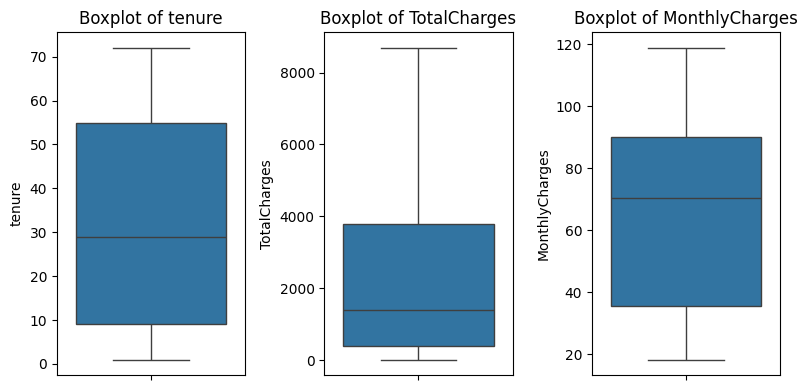

In [14]:
import seaborn as sns
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
sns.boxplot(data=df_cleaned['tenure'])
plt.title('Boxplot of tenure')

plt.subplot(1,3,2)
sns.boxplot(data=df_cleaned['TotalCharges'])
plt.title('Boxplot of TotalCharges')

plt.subplot(1,3,3)
sns.boxplot(data=df_cleaned['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')

plt.tight_layout()
plt.show()

# **Analysis based on Boxplots**
Tenure boxplot:
- Shows wide range of values with no aparent outliers.

Total Charges:
- Also shows wide range but with some outliers at higher end.

Monthly Charges:
- Shows relatively uniform distribution across the range, with no significant outliers.

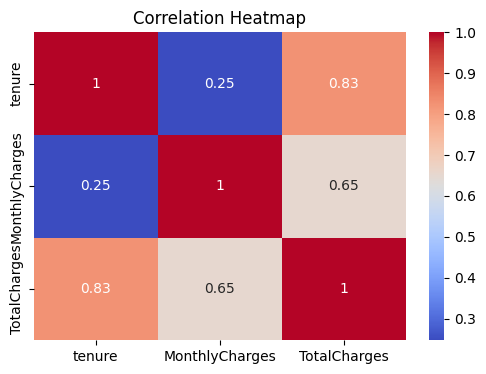

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Analysis Based on Heatmap**
- There is a strong positive correlation between tenure and TotalCharges, which is expected as customers with longer tenure will generally have higher total charges.
- There is a moderate positive correlation between MonthlyCharges and TotalCharges.
- There is a weak positive correlation between tenure and MonthlyCharges.


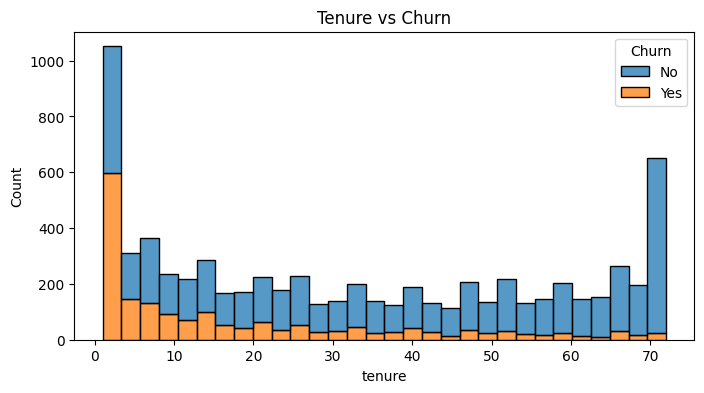

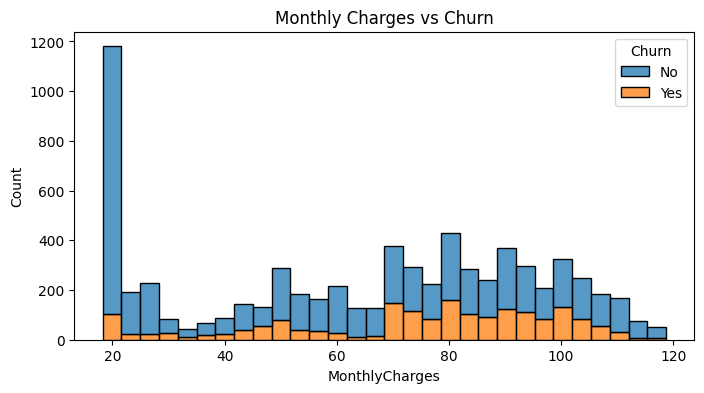

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_cleaned, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure vs Churn")

plt.figure(figsize=(8, 4))
sns.histplot(data=df_cleaned, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title("Monthly Charges vs Churn")

plt.show()


# **Analysis Based on Above Histogram**
Tenure vs Churn:
- Shows that customers with lower tenure have a significantly higher churn rate compared to those with longer tenure.
- As tenure increases, the proportion of churned customers decreases.

Monthly Charges vs Churn:
- Shows that customers with higher monthly charges have a higher likelihood of churning.
- The bars representing churn are taller for higher monthly charge ranges.